In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

In [2]:
df = pd.read_csv('heart.csv')
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [3]:
# Label encoding for class column. 0 for negative and 1 for positive.
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


In [4]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


In [5]:
# We have 0 nulls in our dataset.
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [6]:
# First 5 rows.
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [7]:
# Statistics of the dataset.
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


In [8]:
# Columns.
df.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [9]:
X = df.drop(columns='class', axis=1)
y = df['class']

In [10]:
# Splitting the dataset into train and test splits.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Standardize the features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

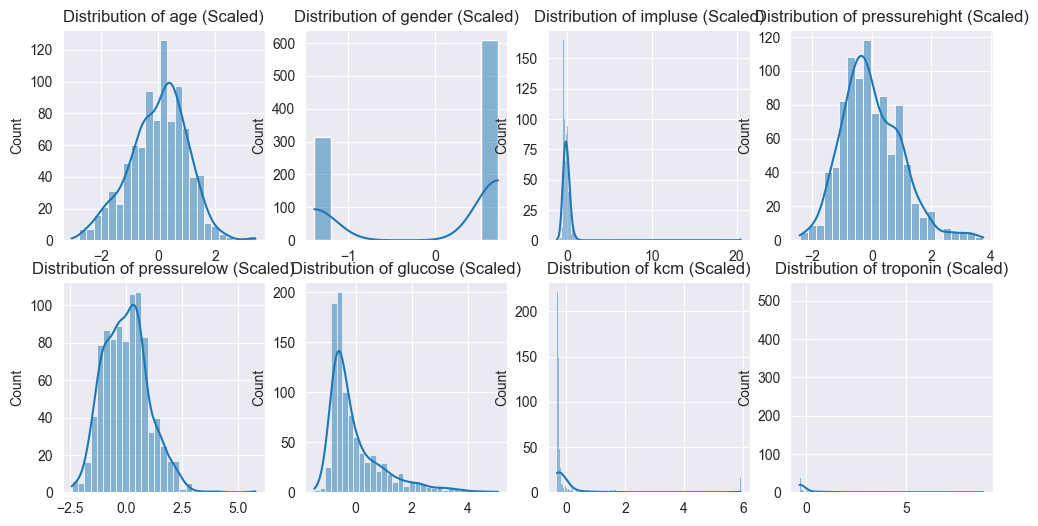

In [12]:
# Scaled Distribution Visualization

plt.figure(figsize=(12,6))

for i, feature in enumerate(X.columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(X_train_scaled[:, i], kde=True)
    plt.title(f'Distribution of {feature} (Scaled)')

<Axes: title={'center': 'Age Distribution'}, xlabel='age', ylabel='Count'>

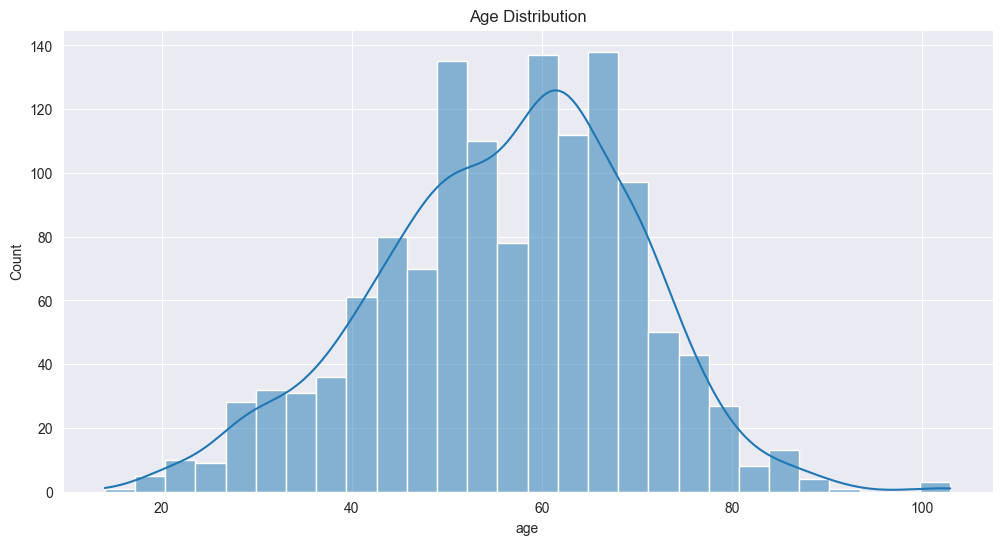

In [13]:
# Age Distribution

plt.figure(figsize=(12,6))
plt.title('Age Distribution')
plt.ylabel('Count')
sns.histplot(df['age'], kde=True)

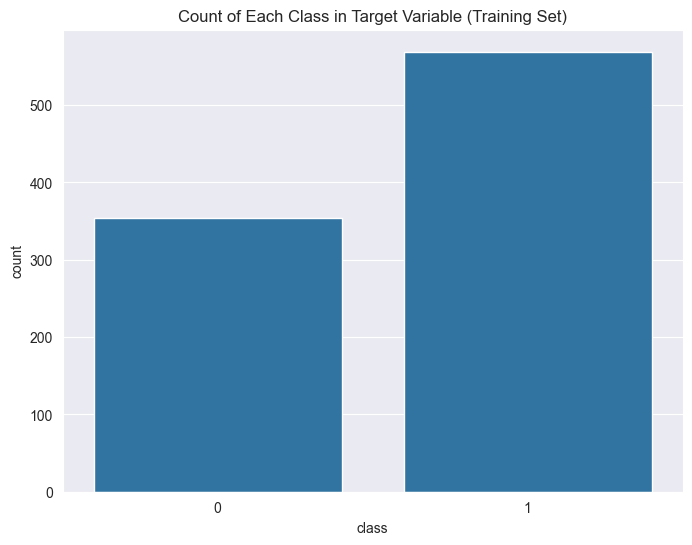

In [14]:
# Categorical Feature Analysis

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Count of Each Class in Target Variable (Training Set)')
plt.show()

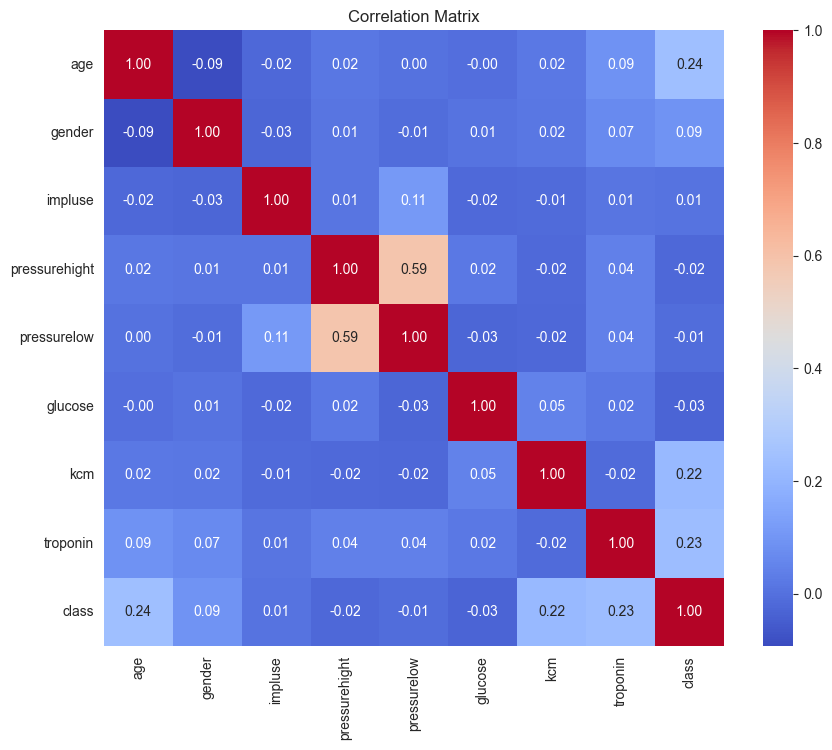

In [15]:
# Correlation Analysis

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Random Forest Classifier

-- Random Forest Classifier Without Hyperparameter Tuning

In [16]:
# RandomForestClassifier before hyperparameter tuning.
model1 = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
model1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

[Text(0.53125, 0.9666666666666667, 'x[1] <= 0.5\nentropy = 0.953\nsamples = 583\nvalue = [344, 579]'),
 Text(0.2109375, 0.9, 'x[4] <= 44.5\nentropy = 0.993\nsamples = 204\nvalue = [149, 182]'),
 Text(0.1796875, 0.8333333333333334, 'entropy = 0.0\nsamples = 3\nvalue = [0, 7]'),
 Text(0.2421875, 0.8333333333333334, 'x[4] <= 55.5\nentropy = 0.995\nsamples = 201\nvalue = [149, 175]'),
 Text(0.0625, 0.7666666666666667, 'x[0] <= 45.5\nentropy = 0.736\nsamples = 15\nvalue = [23, 6]'),
 Text(0.03125, 0.7, 'entropy = 0.0\nsamples = 6\nvalue = [13, 0]'),
 Text(0.09375, 0.7, 'x[0] <= 56.5\nentropy = 0.954\nsamples = 9\nvalue = [10, 6]'),
 Text(0.0625, 0.6333333333333333, 'entropy = 0.0\nsamples = 3\nvalue = [0, 4]'),
 Text(0.125, 0.6333333333333333, 'x[6] <= 42.5\nentropy = 0.65\nsamples = 6\nvalue = [10, 2]'),
 Text(0.09375, 0.5666666666666667, 'entropy = 0.0\nsamples = 5\nvalue = [10, 0]'),
 Text(0.15625, 0.5666666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(0.421875, 0.76666

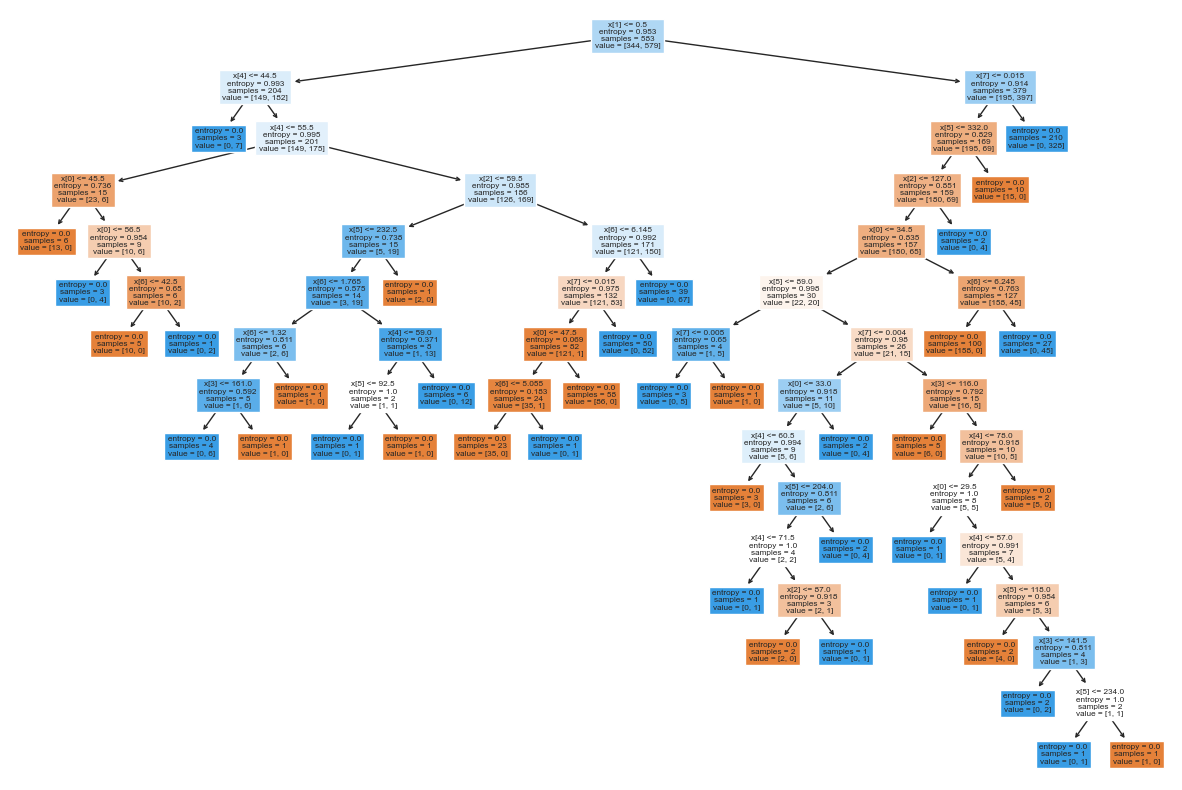

In [17]:
# Tree of our RFC before hyperparameter tuning.
plt.figure(figsize=(15,10))
tree.plot_tree(model1.estimators_[5],filled=True)

In [18]:
# Prediction
y_pred = model1.predict(X_test)

In [19]:
# Accuracy Score
accuracy_score(y_test, y_pred)

0.9797979797979798

In [20]:
# Classification Report
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.974194,0.974194,0.974194,155.000000
1,0.983402,0.983402,0.983402,241.000000
accuracy,0.979798,0.979798,0.979798,0.979798
macro avg,0.978798,0.978798,0.978798,396.000000
weighted avg,0.979798,0.979798,0.979798,396.000000


-- Random Forest Classifier With Hyperparameter Tuning (GridSearchCV)

In [21]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [22]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [23]:
rf_Model = RandomForestClassifier() 

In [24]:
grid_search = GridSearchCV(estimator=rf_Model, param_grid=param_grid, cv=5, n_jobs=1, scoring='accuracy', error_score=0)
grid_results = grid_search.fit(X_train, y_train)

/Users/omerburakguler/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
800 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/omerburakguler/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/omerburakguler/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/Users/omerburakguler/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 666, in _validate_

In [25]:
model2 = rf_Model.set_params(**grid_results.best_params_)
model2.fit(X_train, y_train)
y_pred_rf = model2.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred_rf)

0.9797979797979798

In [27]:
pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).T

,precision,recall,f1-score,support
0,0.980392,0.967742,0.974026,155.000000
1,0.979424,0.987552,0.983471,241.000000
accuracy,0.979798,0.979798,0.979798,0.979798
macro avg,0.979908,0.977647,0.978749,396.000000
weighted avg,0.979803,0.979798,0.979774,396.000000


K-Neighbors Classifier

-- K-Neighbors Classifier Without Hypermeter Tuning

In [28]:
model3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model3.fit(X_train_scaled, y_train)
y_pred = model3.predict(X_test_scaled)

In [29]:
accuracy_score(y_test, y_pred)

0.6313131313131313

In [30]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.527950,0.548387,0.537975,155.000000
1,0.702128,0.684647,0.693277,241.000000
accuracy,0.631313,0.631313,0.631313,0.631313
macro avg,0.615039,0.616517,0.615626,396.000000
weighted avg,0.633952,0.631313,0.632490,396.000000


-- K-Neighbors Classifier With Hypermeter Tuning (GridSearchCV)

In [31]:
# Parameters
knn_params = {
    'n_neighbors': range(1,30,2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1,50,5)
}

In [32]:
knn = KNeighborsClassifier()

In [33]:
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, cv=5, n_jobs=1, scoring='accuracy', error_score=0)
grid_results = grid_search.fit(X_train_scaled, y_train)

In [34]:
# Best Model
model4 = knn.set_params(**grid_results.best_params_)
model4.fit(X_train_scaled, y_train)
y_pred_knn = model4.predict(X_test_scaled)

In [35]:
accuracy_score(y_test, y_pred_knn)

0.6742424242424242

In [36]:
pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict=True)).T

,precision,recall,f1-score,support
0,0.580247,0.606452,0.593060,155.000000
1,0.739316,0.717842,0.728421,241.000000
accuracy,0.674242,0.674242,0.674242,0.674242
macro avg,0.659782,0.662147,0.660740,396.000000
weighted avg,0.677054,0.674242,0.675439,396.000000


Decision Tree Classifier

-- Decision Tree Classifier Without Hyperparameter Tuning

In [37]:
model5 = DecisionTreeClassifier()
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.9823232323232324

In [39]:
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.986842,0.967742,0.977199,155.000000
1,0.979508,0.991701,0.985567,241.000000
accuracy,0.982323,0.982323,0.982323,0.982323
macro avg,0.983175,0.979722,0.981383,396.000000
weighted avg,0.982379,0.982323,0.982292,396.000000


-- Decision Tree Classifier With Hypermeter Tuning

In [40]:
dt_classifier = DecisionTreeClassifier()

In [41]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [42]:
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=5, scoring='accuracy')
grid_results = grid_search.fit(X_train, y_train)

In [43]:
model6 = dt_classifier.set_params(**grid_results.best_params_)
model6.fit(X_train, y_train)
y_pred_dtc = model6.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred_dtc)

0.9797979797979798

In [45]:
pd.DataFrame(classification_report(y_test, y_pred_dtc, output_dict=True)).T

,precision,recall,f1-score,support
0,0.980392,0.967742,0.974026,155.000000
1,0.979424,0.987552,0.983471,241.000000
accuracy,0.979798,0.979798,0.979798,0.979798
macro avg,0.979908,0.977647,0.978749,396.000000
weighted avg,0.979803,0.979798,0.979774,396.000000


In [48]:
print(model1.predict(scaler.transform([[30,1,85,150,90,200,5,0.8]])))
print(model2.predict(scaler.transform([[30,1,85,150,90,200,5,0.8]])))
print(model3.predict(scaler.transform([[30,1,85,150,90,200,5,0.8]])))
print(model4.predict(scaler.transform([[30,1,85,150,90,200,5,0.8]])))
print(model5.predict(scaler.transform([[30,1,85,150,90,200,5,0.8]])))
print(model6.predict(scaler.transform([[30,1,85,150,90,200,5,0.8]])))

[1]
[1]
[0]
[0]
[1]
[1]


/Users/omerburakguler/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/omerburakguler/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/omerburakguler/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/omerburakguler/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/omerburakguler/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with 